# Quickstart

In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

ds         y
0  2007-12-10  9.590761
1  2007-12-11  8.519590
2  2007-12-12  8.183677
3  2007-12-13  8.072467
4  2007-12-14  7.893572

In [3]:
m = Prophet()
m.fit(df)

12:59:14 - cmdstanpy - INFO - Chain [1] start processing
12:59:14 - cmdstanpy - INFO - Chain [1] done processing


In [4]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
3265 2017-01-15
3266 2017-01-16
3267 2017-01-17
3268 2017-01-18
3269 2017-01-19

In [5]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
3265 2017-01-15  8.195674    7.475336    8.890393
3266 2017-01-16  8.520652    7.785681    9.216334
3267 2017-01-17  8.308023    7.573479    9.092924
3268 2017-01-18  8.140602    7.448223    8.882093
3269 2017-01-19  8.152455    7.459244    8.886731

/opt/venv/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/venv/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


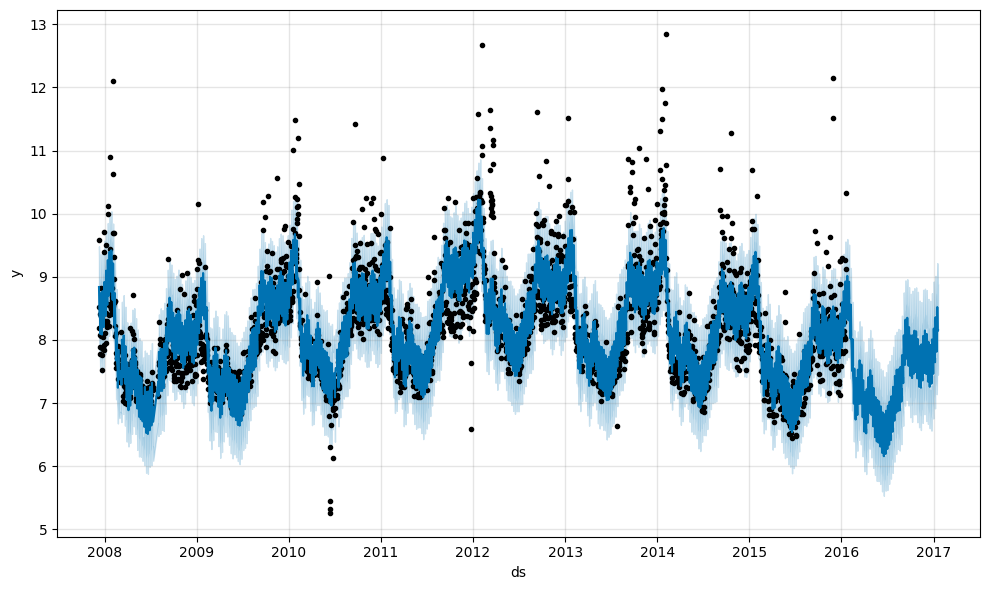

In [6]:
fig1 = m.plot(forecast)

/opt/venv/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/venv/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/venv/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on t

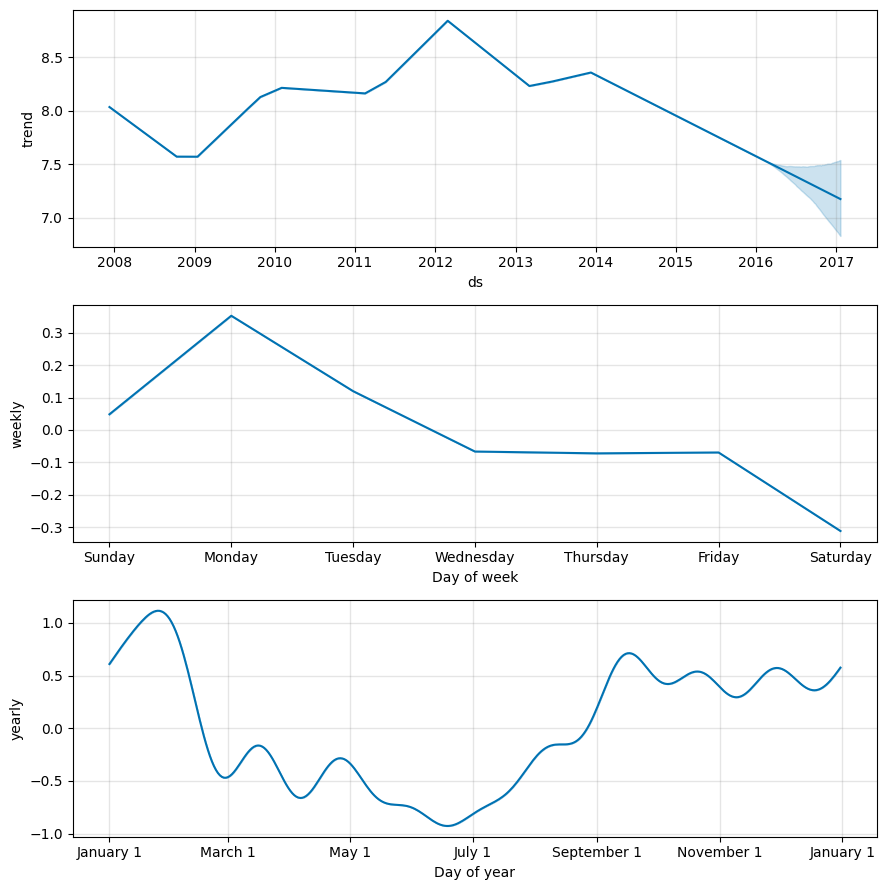

In [7]:
fig2 = m.plot_components(forecast)

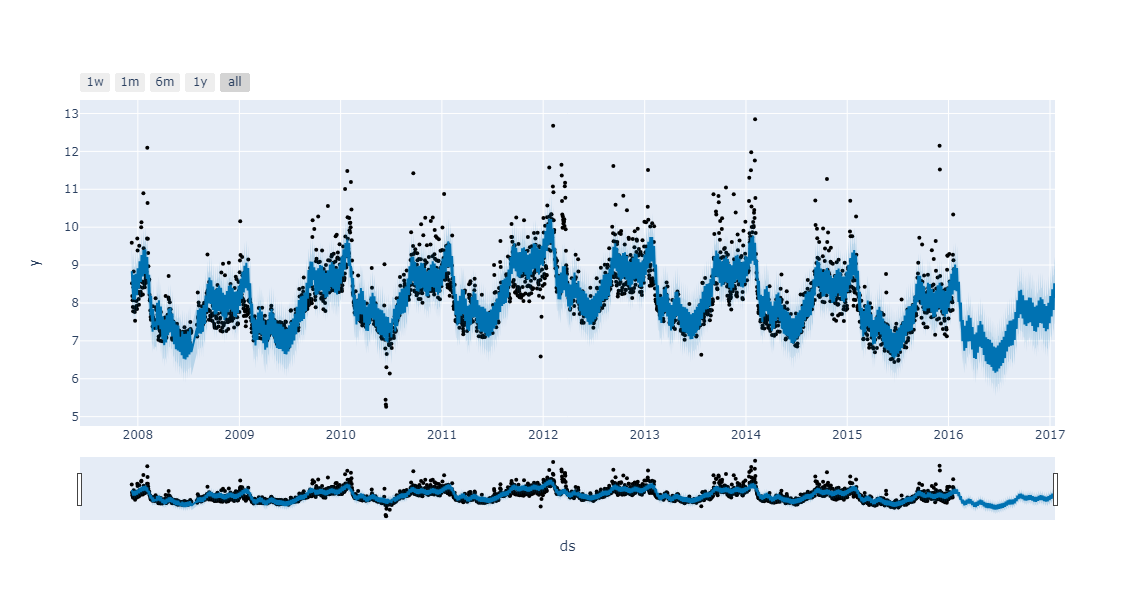

In [8]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

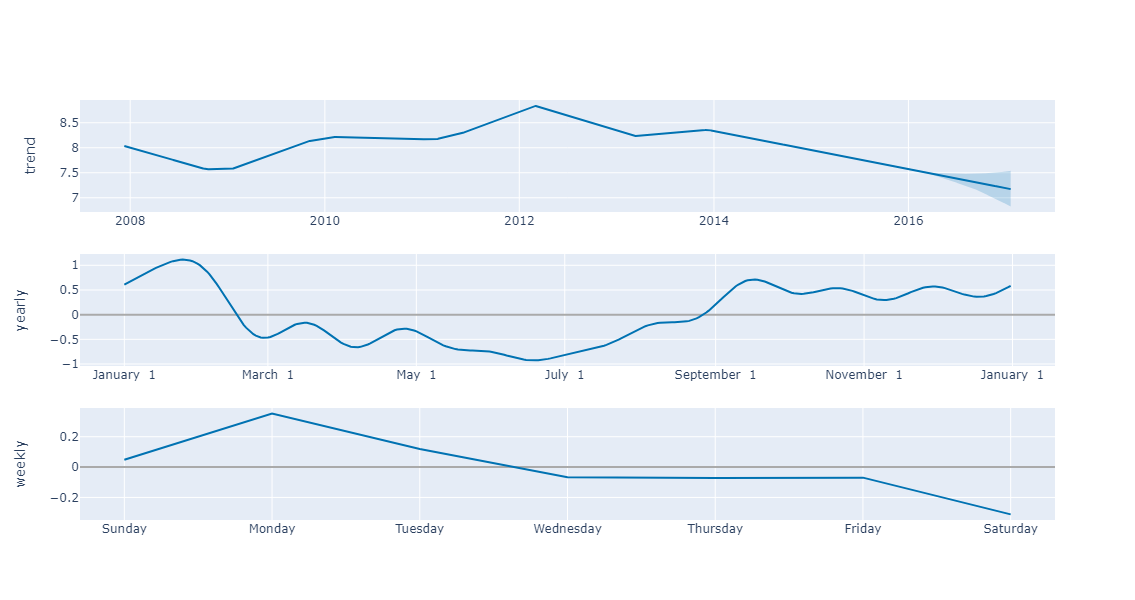

In [9]:
plot_components_plotly(m, forecast)

## Saturating Forecasts

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')

13:04:29 - cmdstanpy - INFO - Chain [1] start processing
13:04:29 - cmdstanpy - INFO - Chain [1] done processing
/opt/venv/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/venv/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



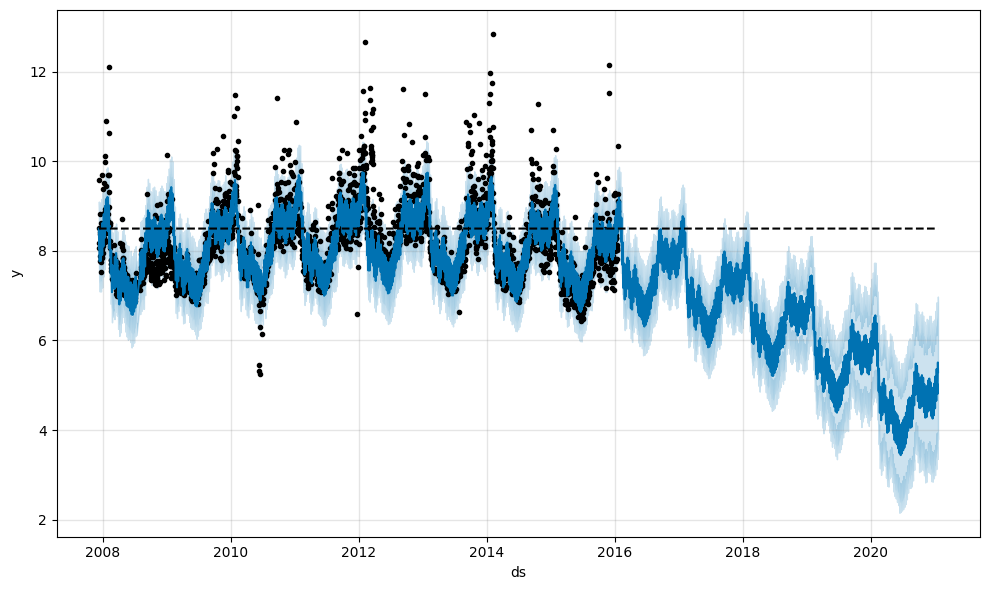

In [13]:
df['cap'] = 8.5
m = Prophet(growth='logistic')
m.fit(df)
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
fig = m.plot(fcst)

### Saturating Minimum

13:04:36 - cmdstanpy - INFO - Chain [1] start processing
13:04:36 - cmdstanpy - INFO - Chain [1] done processing
/opt/venv/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/venv/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



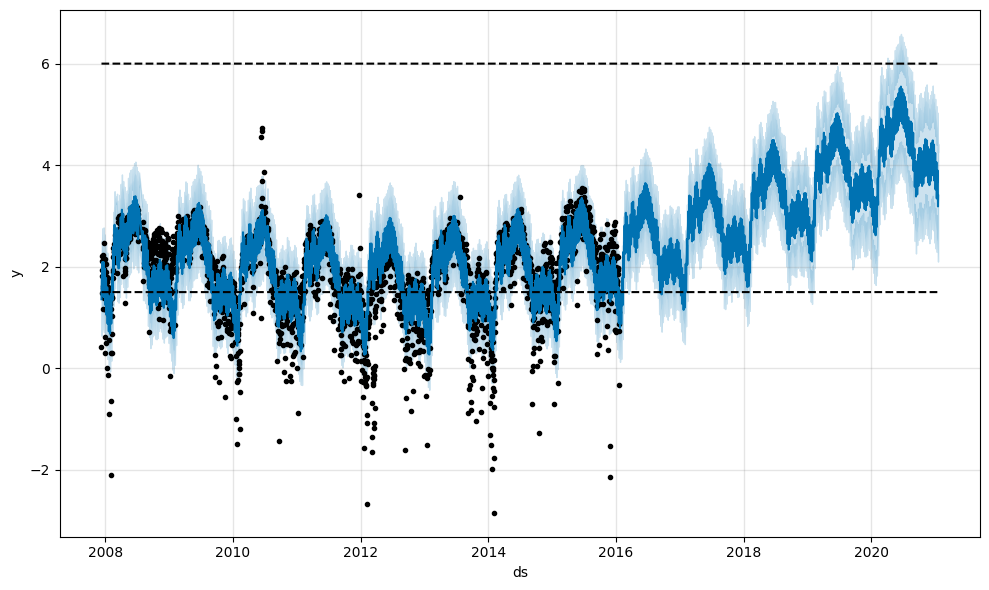

In [14]:
df['y'] = 10 - df['y']
df['cap'] = 6
df['floor'] = 1.5
future['cap'] = 6
future['floor'] = 1.5
m = Prophet(growth='logistic')
m.fit(df)
fcst = m.predict(future)
fig = m.plot(fcst)

## Automatic Changepoint Detection

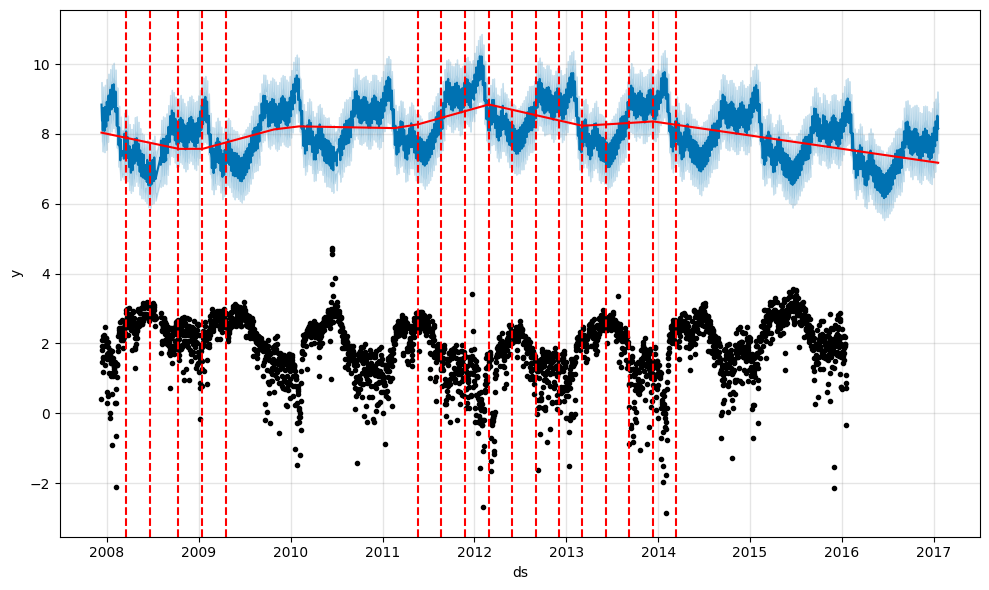

In [15]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

### Adjusting Trend Flexibility

13:06:05 - cmdstanpy - INFO - Chain [1] start processing
13:06:06 - cmdstanpy - INFO - Chain [1] done processing
/opt/venv/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/venv/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



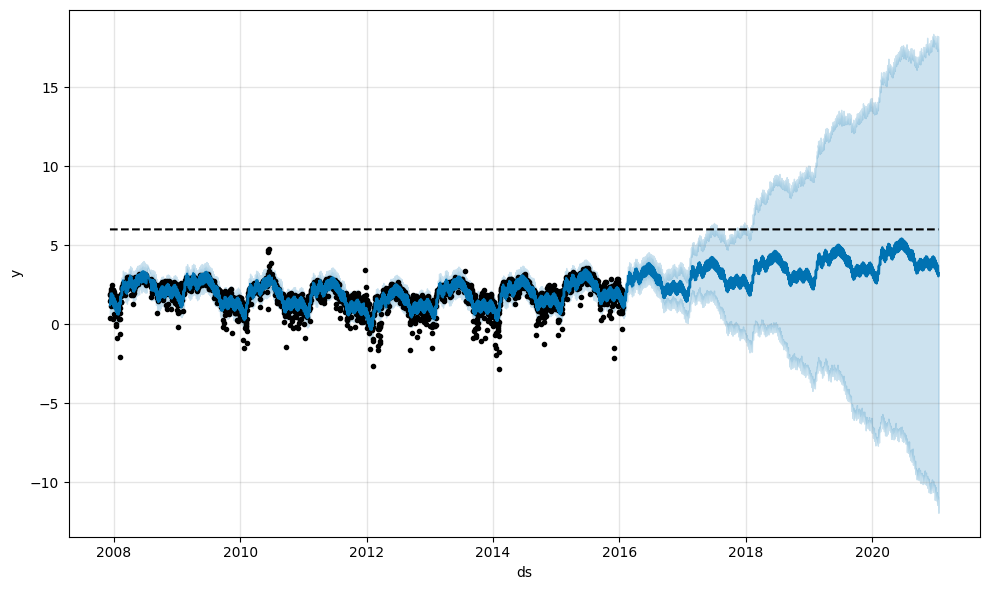

In [16]:
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

13:06:26 - cmdstanpy - INFO - Chain [1] start processing
13:06:26 - cmdstanpy - INFO - Chain [1] done processing
/opt/venv/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/venv/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



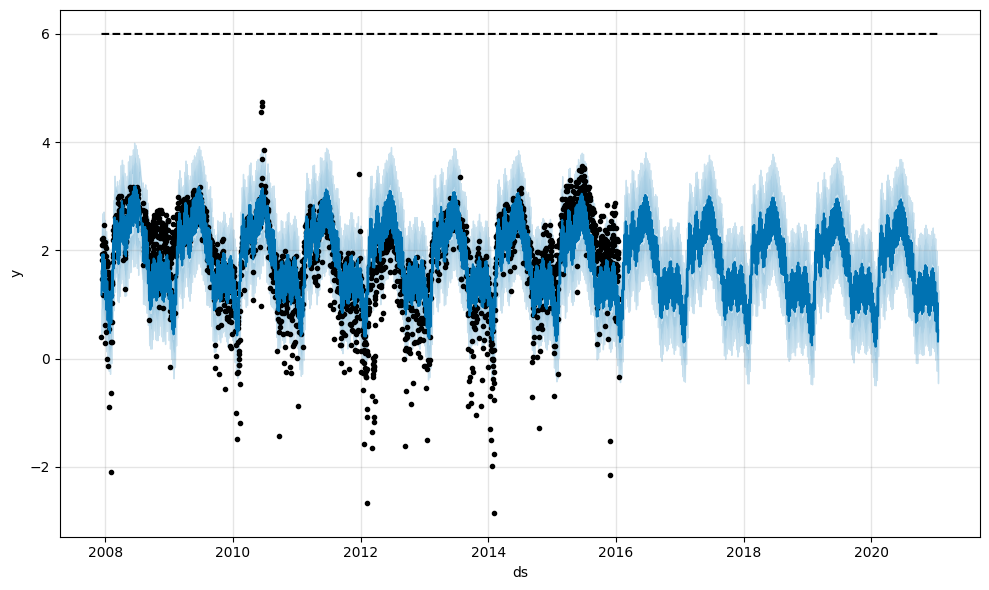

In [17]:
m = Prophet(changepoint_prior_scale=0.001)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

13:06:38 - cmdstanpy - INFO - Chain [1] start processing
13:06:38 - cmdstanpy - INFO - Chain [1] done processing
/opt/venv/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/venv/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



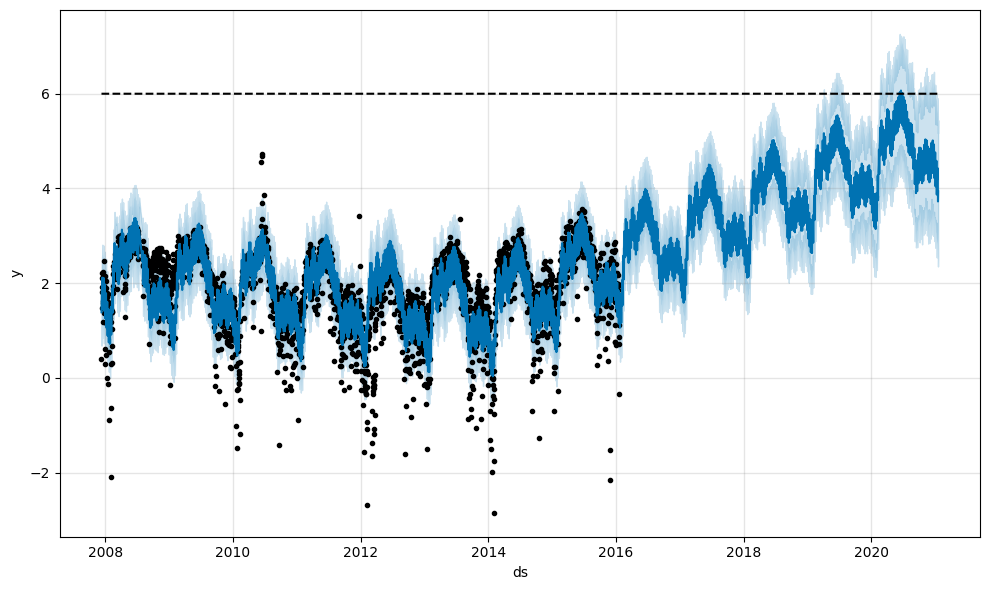

In [18]:
m = Prophet(changepoints=['2014-01-01'])
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

### Uncertainty Intervals

In [19]:
forecast = Prophet(interval_width=0.95).fit(df).predict(future)

13:09:07 - cmdstanpy - INFO - Chain [1] start processing
13:09:07 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
m = Prophet(mcmc_samples=300)
forecast = m.fit(df, show_progress=False).predict(future)

13:09:50 - cmdstanpy - INFO - CmdStan start processing
13:09:50 - cmdstanpy - INFO - Chain [1] start processing
13:09:50 - cmdstanpy - INFO - Chain [2] start processing
13:09:50 - cmdstanpy - INFO - Chain [3] start processing
13:09:50 - cmdstanpy - INFO - Chain [4] start processing
13:10:30 - cmdstanpy - INFO - Chain [1] done processing
13:10:32 - cmdstanpy - INFO - Chain [3] done processing
13:10:32 - cmdstanpy - INFO - Chain [2] done processing
13:10:33 - cmdstanpy - INFO - Chain [4] done processing
13:10:33 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	E

/opt/venv/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/venv/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/venv/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



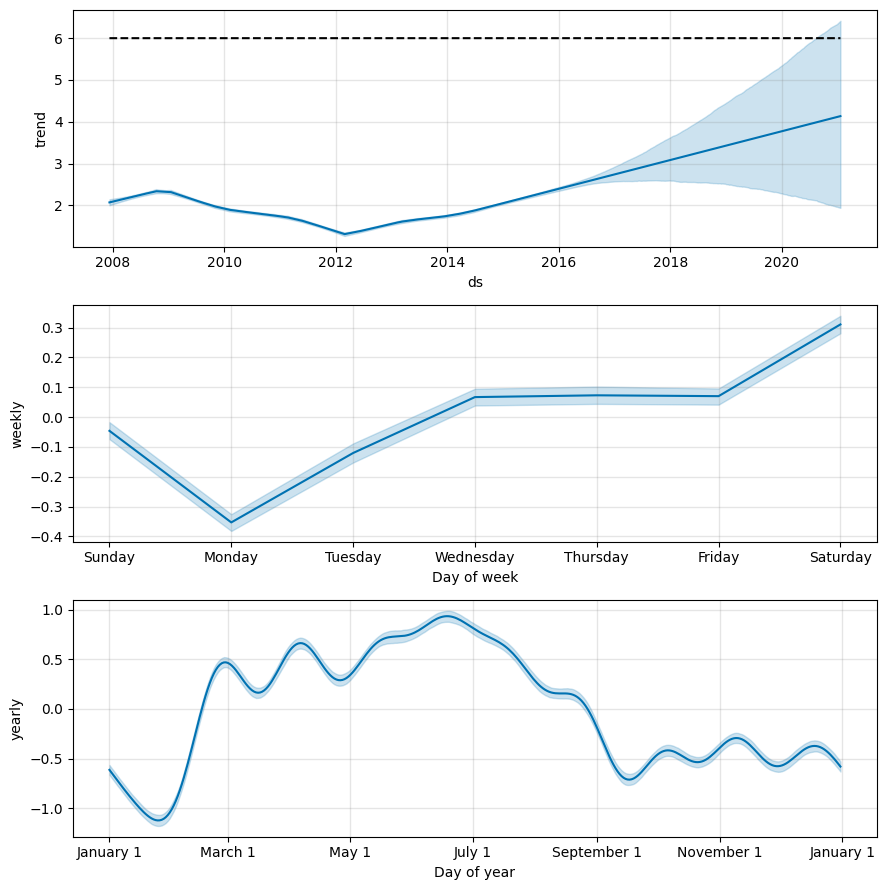

In [22]:
fig = m.plot_components(forecast)

In [23]:
m.predictive_samples(future)

{'yhat': array([[1.39213938, 1.40300832, 1.79723325, ..., 1.50335592, 1.40927848,
         0.75864764],
        [1.79761587, 1.51950299, 1.56672558, ..., 1.75044807, 2.26469263,
         2.0090588 ],
        [1.73594568, 1.76401253, 1.47621431, ..., 1.40092069, 1.19261554,
         0.56769643],
        ...,
        [1.53163673, 2.64684871, 0.23991863, ..., 4.65964024, 5.88150976,
         6.49388975],
        [0.15548798, 2.10606741, 0.67196187, ..., 4.73904242, 5.81805462,
         5.59800335],
        [0.35696646, 2.73437759, 1.1979106 , ..., 5.09826206, 4.69814183,
         6.1675046 ]]),
 'trend': array([[2.09326561, 2.09326561, 2.13087985, ..., 2.11576783, 2.06897742,
         2.06897742],
        [2.09386284, 2.09386284, 2.13157116, ..., 2.1165275 , 2.06985419,
         2.06985419],
        [2.09446007, 2.09446007, 2.13226247, ..., 2.11728717, 2.07073096,
         2.07073096],
        ...,
        [1.82360551, 3.32888044, 1.83914404, ..., 5.5729714 , 6.90589476,
         7.277799

## Saving Models

In [24]:
from prophet.serialize import model_to_json, model_from_json

with open('serialized_model.json', 'w') as fout:
    fout.write(model_to_json(m))  # Save model

with open('serialized_model.json', 'r') as fin:
    m = model_from_json(fin.read())  # Load model

## Flat Trend

In [25]:
m = Prophet(growth='flat')

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

regressor = "location_4"
target = "location_41"
cutoff = pd.to_datetime("2023-04-17 00:00:00")

df = (
    pd.read_csv(
        "https://raw.githubusercontent.com/facebook/prophet/main/examples/example_pedestrians_multivariate.csv", 
        parse_dates=["ds"]
    )
    .rename(columns={target: "y"})
)
train = df.loc[df["ds"] < cutoff]
test = df.loc[df["ds"] >= cutoff]

In [30]:
def fit_model(growth):
    m = Prophet(growth=growth, seasonality_mode="multiplicative", daily_seasonality=15)
    m.add_regressor("location_4", mode="multiplicative")
    m.fit(train)
    preds = pd.merge(
        test,
        m.predict(test),
        on="ds",
        how="inner"
    )
    mape = ((preds["yhat"] - preds["y"]).abs() / preds["y"]).mean()
    return m, preds, mape

In [31]:
m_linear, preds_linear, mape_linear = fit_model("linear")

13:16:10 - cmdstanpy - INFO - Chain [1] start processing
13:16:10 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
m_flat, preds_flat, mape_flat = fit_model("flat")

13:16:11 - cmdstanpy - INFO - Chain [1] start processing
13:16:11 - cmdstanpy - INFO - Chain [1] done processing


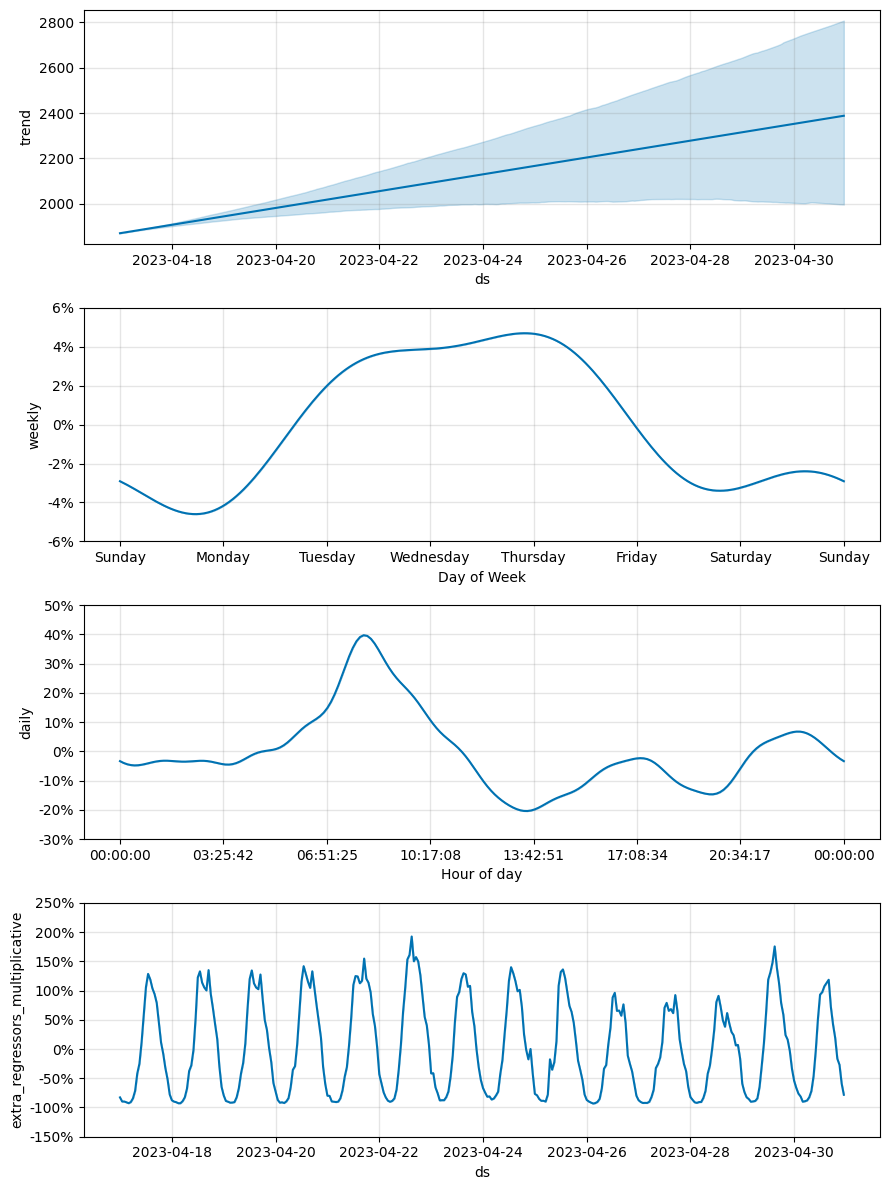

In [33]:
m_linear.plot_components(preds_linear);

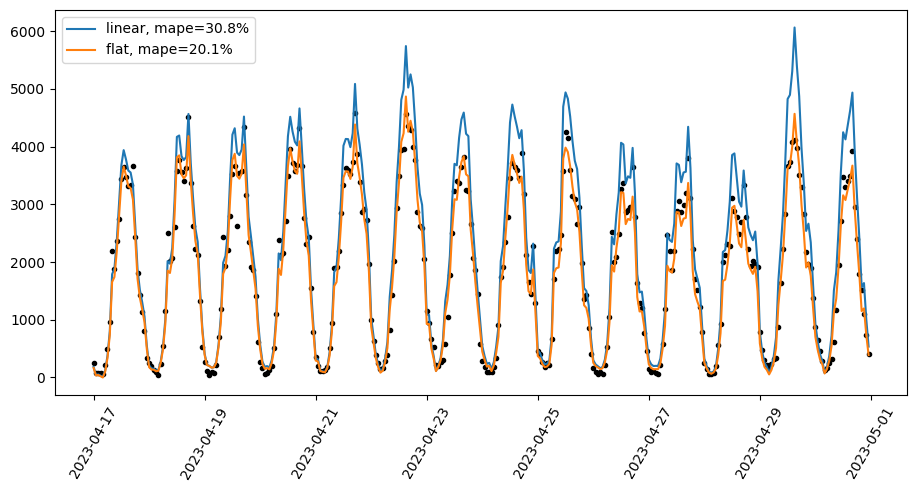

In [34]:
fig, ax = plt.subplots(figsize=(11, 5))
ax.scatter(preds_linear["ds"], preds_linear["y"], color="black", marker=".")
ax.plot(preds_linear["ds"], preds_linear["yhat"], label=f"linear, mape={mape_linear:.1%}")
ax.plot(preds_flat["ds"], preds_flat["yhat"], label=f"flat, mape={mape_flat:.1%}")
plt.xticks(rotation=60)
ax.legend()

### Updating fitted models

In [36]:
def warm_start_params(m):
    """
    Retrieve parameters from a trained model in the format used to initialize a new Stan model.
    Note that the new Stan model must have these same settings:
        n_changepoints, seasonality features, mcmc sampling
    for the retrieved parameters to be valid for the new model.

    Parameters
    ----------
    m: A trained model of the Prophet class.

    Returns
    -------
    A Dictionary containing retrieved parameters of m.
    """
    res = {}
    for pname in ['k', 'm', 'sigma_obs']:
        if m.mcmc_samples == 0:
            res[pname] = m.params[pname][0][0]
        else:
            res[pname] = np.mean(m.params[pname])
    for pname in ['delta', 'beta']:
        if m.mcmc_samples == 0:
            res[pname] = m.params[pname][0]
        else:
            res[pname] = np.mean(m.params[pname], axis=0)
    return res

df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df1 = df.loc[df['ds'] < '2016-01-19', :]  # All data except the last day
m1 = Prophet().fit(df1) # A model fit to all data except the last day

# %timeit m2 = Prophet().fit(df)  # Adding the last day, fitting from scratch
# %timeit m2 = Prophet().fit(df, init=warm_start_params(m1))  # Adding the last day, warm-starting from m1

13:18:28 - cmdstanpy - INFO - Chain [1] start processing
13:18:28 - cmdstanpy - INFO - Chain [1] done processing
